For calculation the properbility of a constinous random variable in the spectrum of a to b in a uniform CDF

The probability between 0.2 and 0.6 is: 0.39999999999999997


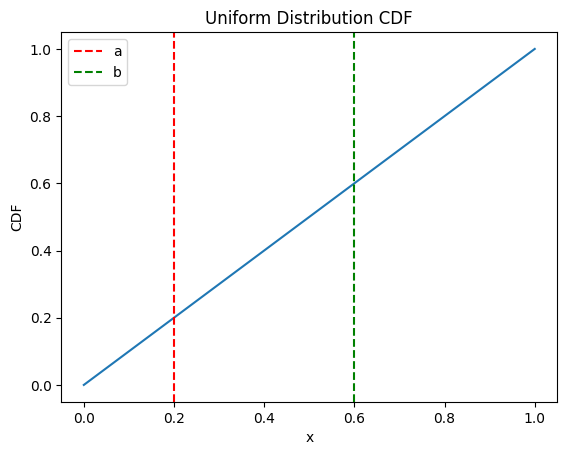

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

def calculate_probability(a, b):
    cdf_b = stats.uniform.cdf(b)
    cdf_a = stats.uniform.cdf(a)
    probability = cdf_b - cdf_a
    return probability

# Example usage
a = 0.2  # Lower bound
b = 0.6  # Upper bound

probability = calculate_probability(a, b)
print(f"The probability between {a} and {b} is: {probability}")

# Plotting the CDF
x = np.linspace(0, 1, 1000)
y = stats.uniform.cdf(x)

plt.plot(x, y)
plt.axvline(x=a, color='r', linestyle='--', label='a')
plt.axvline(x=b, color='g', linestyle='--', label='b')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Uniform Distribution CDF')
plt.legend()
plt.show()


For random cdf, can be difined manually for a set of values:

Integral of PDF over [-1, 1]: 0.4018470403377399


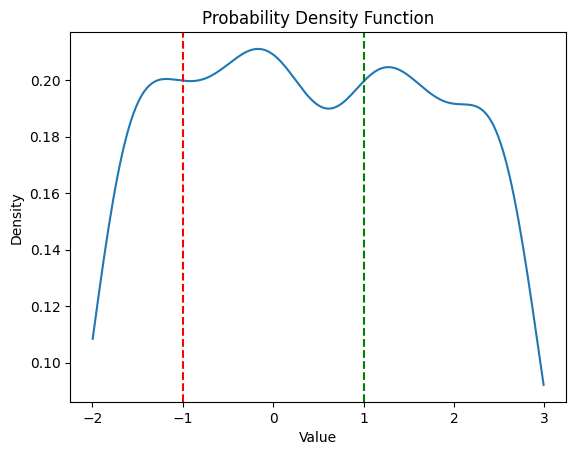

In [28]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad

def create_pdf(data):
    # Create a probability density function (PDF) of the data using kernel density estimation (KDE)
    kde = gaussian_kde(data)

    # Evaluate the PDF on a grid of points
    x_vals = np.linspace(min(data), max(data), num=200)
    y_vals = kde(x_vals)

    # Return the x and y values of the PDF
    return x_vals, y_vals

def calculate_integral(pdf, x_start, x_end, num_points=10000):
    # Define a lambda function for the PDF that takes a single argument x
    pdf_func = lambda x: np.interp(x, pdf[0], pdf[1])
    
    # Calculate the integral of the PDF over the given range using the quad function from scipy
    x_vals = np.linspace(x_start, x_end, num=num_points)
    y_vals = pdf_func(x_vals)
    dx = (x_end - x_start) / (num_points - 1)
    integral = np.sum(y_vals) * dx
    
    if integral >= 1:
        integral = 1
    
    return integral

# Generate a list of random values
data = []
for i in range(1000):
    value = random.uniform(-2, 3)
    data.append(value)

#
# Data can manually be difined as a list of values
#

# Create a probability density function (PDF) of the data
x_vals, y_vals = create_pdf(data)

# Calculate the integral of the PDF over a given range (x_start to x_end):
x_start = -1
x_end = 1
integral = calculate_integral((x_vals, y_vals), x_start, x_end)
print("Integral of PDF over [{}, {}]: {}".format(x_start, x_end, integral))

# Plot the PDF
plt.plot(x_vals, y_vals)
plt.axvline(x=x_start, color='r', linestyle='--', label='a')
plt.axvline(x=x_end, color='g', linestyle='--', label='b')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.show()